In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import simplejson
import scipy

In [2]:
routesData = pd.read_csv("routes.csv", names = ["airline_code","airline_ID", "src_port_code", "src_port_id",
                                  "dest_port_code","dest_port_id", "code_share", "stops", "equipment"])
routesData.head()

,airline_code,airline_ID,src_port_code,src_port_id,dest_port_code,dest_port_id,code_share,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [3]:
routesData.shape

(67663, 9)

In [4]:
airlineData = pd.read_csv("airlines.csv", names = ["airline_ID","airline_name","alias","iata","airline_code",
                                                   "call_sign","country","active"])
airlineData.head(10)

,airline_ID,airline_name,alias,iata,airline_code,call_sign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
5,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N
6,6,223 Flight Unit State Airline,\N,NaN,CHD,CHKALOVSK-AVIA,Russia,N
7,7,224th Flight Unit,\N,NaN,TTF,CARGO UNIT,Russia,N
8,8,247 Jet Ltd,\N,NaN,TWF,CLOUD RUNNER,United Kingdom,N
9,9,3D Aviation,\N,NaN,SEC,SECUREX,United States,N


In [5]:
airlineData.shape

(6162, 8)

In [6]:
planes =  pd.read_csv("planes.csv", names = ["aircraft_name","iata_name", "icao_name"])
planes.head(10)

,aircraft_name,iata_name,icao_name
0,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
1,Aerospatiale/Alenia ATR 42-300,AT4,AT43
2,Aerospatiale/Alenia ATR 42-500,AT5,AT45
3,Aerospatiale/Alenia ATR 42-600,ATR,AT46
4,Aerospatiale/Alenia ATR 72,AT7,AT72
5,Airbus A300,AB3,A30B
6,Airbus A300-600,ABY,A306
7,Airbus A310,310,A310
8,Airbus A318,318,A318
9,Airbus A319,319,A319


In [7]:
planes.shape

(174, 3)

In [8]:
route_cnt = routesData['equipment'].value_counts()

In [9]:
scipy.stats.describe(route_cnt)

DescribeResult(nobs=3945, minmax=(1, 9180), mean=17.14702154626109, variance=43531.03010332229, skewness=33.48923069663396, kurtosis=1306.7793948868318)

In [10]:
route_cnt.shape

(3945,)

In [11]:
route_cnt[:135,]

320            9180
738            7124
319            3420
737            2211
73H            2043
CRJ            1238
AT7            1194
73W            1155
321            1146
E90            1049
320 319         914
319 320         909
333             886
DH4             866
332             756
763             692
777             617
DH8             610
73G             571
733             560
330             525
ATR             512
ERJ             509
77W             502
SF3             438
CR7             424
757             420
ER4             396
320 321         377
321 320         366
               ... 
BNI              58
321 320 319      58
738 737          58
DH2              57
333 332          57
ERJ CRJ          57
AB6              56
CR7 CRJ          55
340              55
CR9 CRJ          54
ER3              53
321 738          52
787              52
CRJ CR7          51
738 739          51
321 319 320      50
CR7 CR9          50
M83 M80          50
757 738          50


Text(0.5, 0, 'Aircraft')

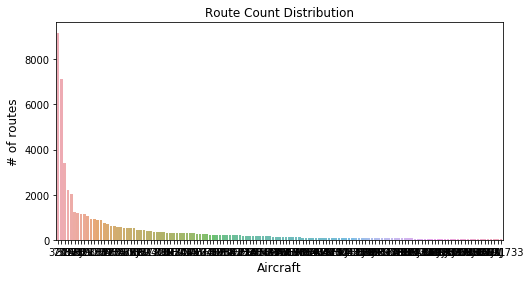

In [12]:
plt.figure(figsize=(8,4))
ax= sns.barplot(route_cnt.index[:135], route_cnt.values[:135], alpha=0.8)
plt.title("Route Count Distribution")
plt.ylabel('# of routes', fontsize=12)
plt.xlabel('Aircraft', fontsize=12)

In [13]:
route_cnt[:135]/sum(route_cnt)

320            0.135708
738            0.105315
319            0.050558
737            0.032685
73H            0.030202
CRJ            0.018301
AT7            0.017651
73W            0.017074
321            0.016941
E90            0.015507
320 319        0.013512
319 320        0.013438
333            0.013098
DH4            0.012802
332            0.011176
763            0.010230
777            0.009121
DH8            0.009018
73G            0.008441
733            0.008279
330            0.007761
ATR            0.007569
ERJ            0.007525
77W            0.007421
SF3            0.006475
CR7            0.006268
757            0.006209
ER4            0.005854
320 321        0.005573
321 320        0.005411
                 ...   
BNI            0.000857
321 320 319    0.000857
738 737        0.000857
DH2            0.000843
333 332        0.000843
ERJ CRJ        0.000843
AB6            0.000828
CR7 CRJ        0.000813
340            0.000813
CR9 CRJ        0.000798
ER3            0

In [14]:
def label_aircraft (row):
    if (pd.isnull(row['equipment'])):
        return "None"
    elif row['equipment'][:2] == '73' or row['equipment'][:2] == '7M' :
        return 'Boeing single aisle'
    elif row['equipment'][:2] == '31' or row['equipment'][:2] == '32':
        return 'Airbus single aisle'
    elif row['equipment'][:2] == '74' or row['equipment'][:2] == '75' or row['equipment'][:2] == '76' or row['equipment'][:2] == '77' or row['equipment'][:2] == '78':
        return 'Boeing twin aisle'
    elif row['equipment'][:2] == '33' or row['equipment'][:2] == '34' or row['equipment'][:2] == '35' or row['equipment'][:2] == '38':
        return 'Airbus twin aisle'
    elif row['equipment'][:2] == 'AT':
        return 'Aerospatiale Regional Jet'
    elif row['equipment'][:1] == 'E':
        return 'Embraer Regional Jet'
    elif row['equipment'][:2] == 'CR':
        return 'Canadair Regional Jet'
    elif row['equipment'][:2] == 'DH':
        return 'De Havilland Canada Regional Jet'
    elif row['equipment'][:2] in ["M1", "M8", "M9", "D1", "D3", "D6", "D9"]:
        return 'McDonnell Douglas (merged with Boeing)'
    else:
        return 'Other'

In [15]:
routesData['aircraft_type'] = routesData.apply (lambda row: label_aircraft (row), axis=1)

In [16]:
aircraft_type_cnt = routesData['aircraft_type'].value_counts()

In [17]:
scipy.stats.describe(aircraft_type_cnt)

DescribeResult(nobs=11, minmax=(18, 20045), mean=6151.181818181818, variance=45717785.96363636, skewness=1.4499440897959612, kurtosis=0.45269420277627237)

In [18]:
aircraft_type_cnt

Airbus single aisle                       20045
Boeing single aisle                       18857
Boeing twin aisle                          5862
Embraer Regional Jet                       4645
Other                                      4263
Airbus twin aisle                          3621
Canadair Regional Jet                      3440
De Havilland Canada Regional Jet           2929
Aerospatiale Regional Jet                  2454
McDonnell Douglas (merged with Boeing)     1529
None                                         18
Name: aircraft_type, dtype: int64

Text(0, 0.5, 'Aircraft type')

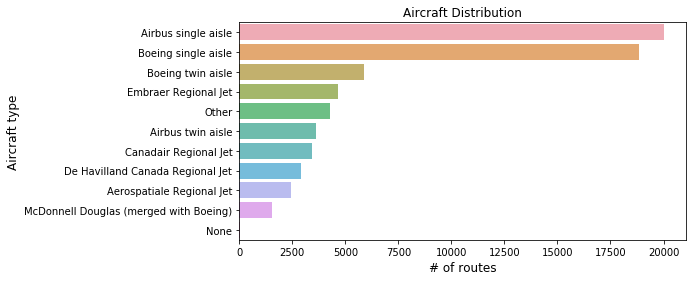

In [19]:
plt.figure(figsize=(8,4))
ax= sns.barplot( aircraft_type_cnt.values, aircraft_type_cnt.index, alpha=0.8)
plt.title("Aircraft Distribution")
plt.xlabel('# of routes', fontsize=12)
plt.ylabel('Aircraft type', fontsize=12)